In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pickle
import string
import seaborn as sns

In [9]:
df = pd.read_csv('mar.txt',encoding='utf8',sep='\t',names=['English','Marathi','Attr'])
df.head()

,English,Marathi,Attr
0,Go.,जा.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...
1,Run!,पळ!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
2,Run!,धाव!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
3,Run!,पळा!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...
4,Run!,धावा!,CC-BY 2.0 (France) Attribution: tatoeba.org #9...


In [10]:
df = df.drop('Attr',axis=1)

In [11]:
df.head()

,English,Marathi
0,Go.,जा.
1,Run!,पळ!
2,Run!,धाव!
3,Run!,पळा!
4,Run!,धावा!


In [12]:
df.shape

(43861, 2)

In [13]:
df.isna().sum()

English    0
Marathi    0
dtype: int64

# Clean the Data

## remove the spaces

In [14]:
df['English'] = df['English'].apply(lambda x : " ".join(x.split()))
df['Marathi'] = df['Marathi'].apply(lambda x : " ".join(x.split()))

## Lowercase the characters

In [15]:
df['English'] = df['English'].apply(lambda x : x.lower())
#Hindi has no uppercase or lowercase characters

# Expand the contractions

In [16]:
with open("contraction_expansion.txt", 'rb') as fp:
    contractions= pickle.load(fp)

In [17]:
def expand_contras(text):
    '''
    takes input as word or list of words
    if it is string and contracted it will expand it
    example:
    it's --> it is
    won't --> would not
    '''
    if type(text) is str:
        for key in contractions:
            value = contractions[key]
            text = text.replace(key, value)
        return text
    else:
        return text

In [18]:
df.sample(10)

,English,Marathi
15102,our cities are dirty.,आमची शहरं घाणेरडी आहेत.
15724,we can't let tom die.,आम्ही टॉमला मरायला देऊ शकत नाही.
11265,what i say is true.,मी जे म्हणतो ते खरं आहे.
38606,"one, three, and five are odd numbers.","एक, तीन व पाच विषम संख्या आहेत."
28023,you are taller than she is.,तू तिच्यापेक्षा उंच आहेस.
34170,i don't like sugar in my coffee.,मला कॉफीत साखर घातलेली आवडत नाही.
6740,the boy ran away.,मुलगा पळून गेला.
3595,put tom to bed.,टॉमला झोपवा.
20746,he was a great musician.,तो एक महान संगीतकार होता.
32701,would you sing at our wedding?,तू आमच्या लग्नात गाशील का?


In [19]:
xyz = "i'm don't he'll you'll"
expand_contras(xyz)

'i am do not he will you will'

In [20]:
df['English'] = df['English'].apply(lambda x : expand_contras(x))
df.sample(10)

,English,Marathi
32012,my sister is younger than you.,ताई तुझ्यापेक्षा वयाने लहान आहे.
3075,do not run away.,पळून जाऊ नकोस.
22109,we have got to go do that.,आम्हाला जाऊन तसं करायला पाहिजे.
2849,where was tom?,टॉम कुठे होता?
24997,i think they are using you.,"ते तुमचा वापर करताहेत, असं मला वाटतंय."
18260,why are you asking me?,तुम्ही मला का विचारत आहात?
6071,how did tom look?,टॉम कसा दिसत होता?
960,i like cake.,मला केक आवडतो.
1702,keep talking.,बोलत रहा.
37836,"in those days, there were no radios.",त्याकाळी रेडिओ नव्हते.


## remove all punctuations

In [21]:
translator= str.maketrans('','', string.punctuation + '।')

In [22]:
df.English= df.English.apply(lambda x: x.translate(translator))
df.Marathi= df.Marathi.apply(lambda x: x.translate(translator))

In [23]:
df.sample(5)

,English,Marathi
17138,is tom your boyfriend,टॉम तुझा बॉयफ्रेंड आहे का
31550,he lives in that yellow house,तो तिथल्या पिवळ्या घरात राहतो
41528,spain once governed the philippine islands,एकेकाळी स्पेन हा फिलिपीन बेटांचे शासन करत होता
14392,his teeth were white,त्याचे दात पांढरे आहेत
31018,tom thinks mary is not hungry,टॉमला वाटतं की मेरीला भूक लागली नाहीये


## remove digits

In [24]:
import re

In [25]:
df.English= df.English.apply(lambda x: re.sub(r'[\d]+','', x))
df.Marathi= df.Marathi.apply(lambda x: re.sub(r'[\d]+','', x))

# Visualize some features of the dataset

## Create new col for count of words

In [27]:
df['en_word_count']= df.English.apply(lambda x: len(x.split()))
df['mar_word_count']= df.Marathi.apply(lambda x: len(x.split()))

## Create new col for count of chars

In [28]:
df['en_char_count']= df.English.apply(lambda x: len(''.join(x.split())))
df['mar_char_count']= df.Marathi.apply(lambda x: len(''.join(x.split())))

In [29]:
df.head()

,English,Marathi,en_word_count,mar_word_count,en_char_count,mar_char_count
0,go,जा,1,1,2,2
1,run,पळ,1,1,3,2
2,run,धाव,1,1,3,3
3,run,पळा,1,1,3,3
4,run,धावा,1,1,3,4


## Plotting

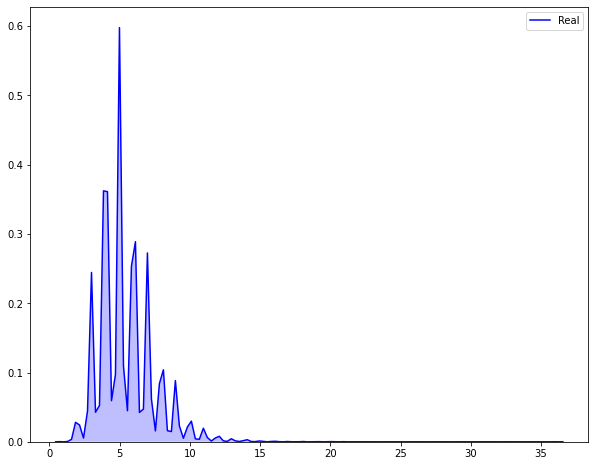

In [30]:
plt.figure(figsize=(10,8))
sns.kdeplot(data=df['en_word_count'],color='blue',label='Real',shade=True)

In [31]:
df.iloc[(df['en_word_count']).argmax()]['English']

'in  roger miller recorded a song called you do not want my love today this song is better known as in the summer time it is the first song he wrote and sang that became popular'

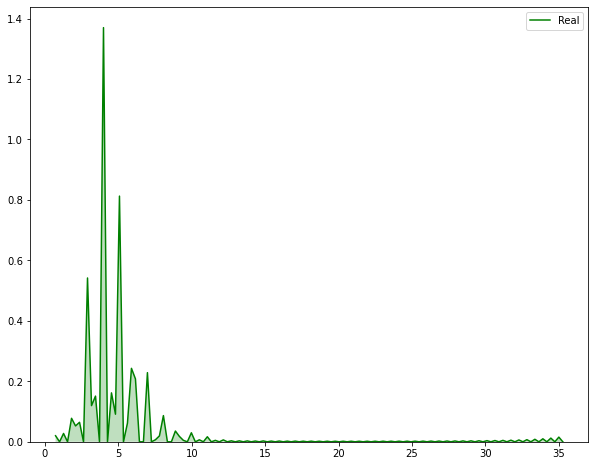

In [32]:
plt.figure(figsize=(10,8))
sns.kdeplot(data=df['mar_word_count'],color='green',label='Real',shade=True)

In [34]:
df.iloc[(df['mar_word_count']).argmax()]['Marathi']

'मध्ये रॉजर मिलरने यू डोन्ट वॉन्ट माय लव्ह नावाचं गाणं रेकॉर्ड केलं आज हे गाणं इन द समर टाइम म्हणून जास्त प्रसिद्ध आहे त्याने लिहिलेलं व गायलेलं हे असं पहिलं गाणं होतं जे लोकप्रिय झालं'

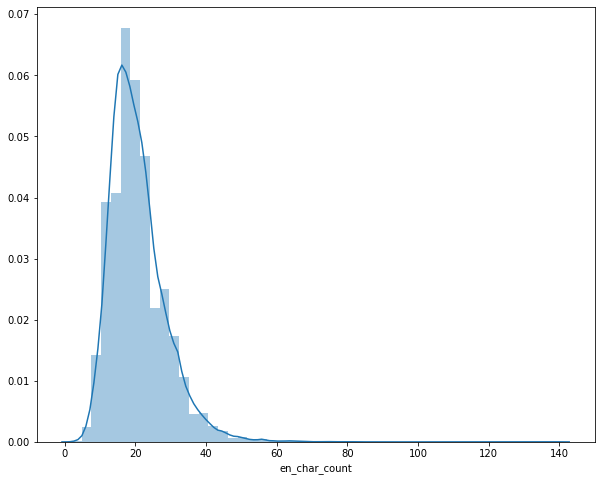

In [35]:
plt.figure(figsize=(10,8))
sns.distplot(df.en_char_count)

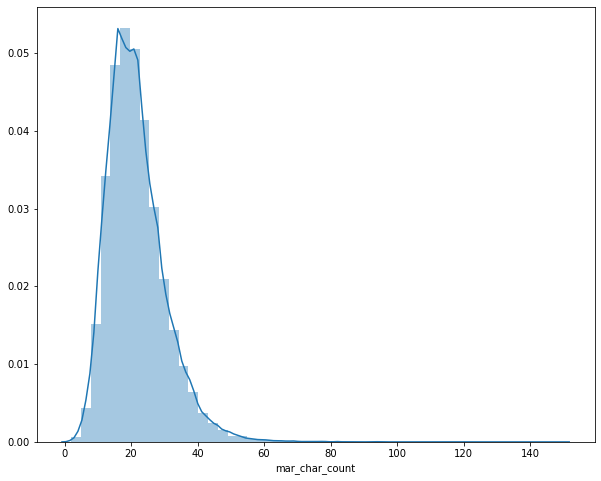

In [36]:
plt.figure(figsize=(10,8))
sns.distplot(df.mar_char_count)

## Plot wordcloud

In [37]:
def plot_word_cloud(data):
    words=""
    for sent in data:
        sent= str(sent)
        sent=sent.lower()
        tokens= sent.split()
        words +=" ".join(tokens)+" "
    #print(words[:10])
    plt.figure(figsize=(15,12))
    wordcloud= WordCloud(width=800,height=800, background_color='aqua').generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')

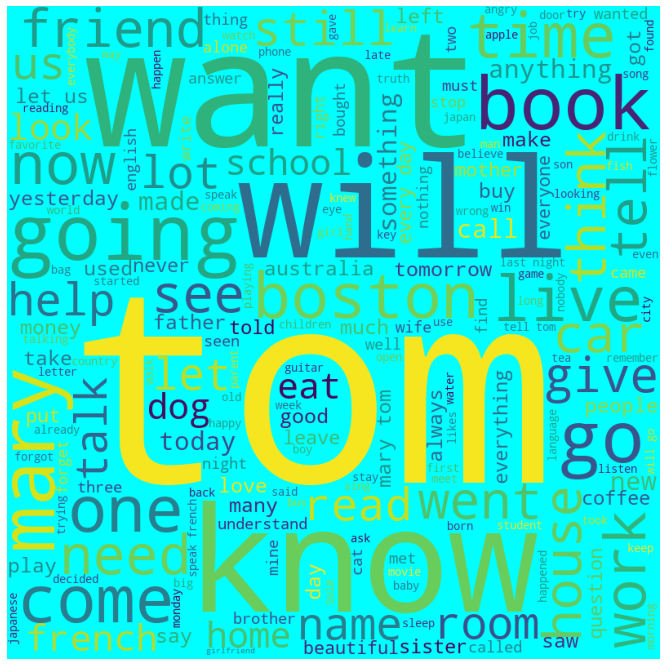

In [38]:
plot_word_cloud(df['English'])

In [39]:
df.to_csv("cleaned.csv",index=None)